In [1]:
import pandas as pd 
import numpy as np                 
import seaborn as sns               
from matplotlib import pyplot as plt 

from sklearn.preprocessing import OneHotEncoder, StandardScaler 
from sklearn.model_selection import train_test_split          
from sklearn.linear_model import LogisticRegression   
from sklearn.decomposition import PCA
from sklearn.model_selection import ( # для кроссвалидации
    StratifiedKFold,
    cross_validate,
    cross_val_score,
    KFold
)

from sklearn import metrics      
from sklearn.metrics import (    
    accuracy_score,              
    balanced_accuracy_score,     
    precision_score,             
    recall_score,                
    confusion_matrix,            
    f1_score,                    
    roc_auc_score,               
    roc_curve,                   
    average_precision_score,     
    precision_recall_curve,       
    classification_report,
    )

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import make_swiss_roll

import torch
import torch.nn as nn
import torch.optim as optim

import os
import statsmodels.api as sm     
import scipy.stats as stats
import networkx as nx                                     
import random
from sklearn.model_selection import GridSearchCV  
import time                         

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/VinogradovAI/breast_cancer_prediction/refs/heads/master/data/raw/data.csv')
data.head() # выведем первые 5 строк таблицы 

,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  569 non-null    int64  
 1   radius1             569 non-null    float64
 2   texture1            569 non-null    float64
 3   perimeter1          569 non-null    float64
 4   area1               569 non-null    float64
 5   smoothness1         569 non-null    float64
 6   compactness1        569 non-null    float64
 7   concavity1          569 non-null    float64
 8   concave_points1     569 non-null    float64
 9   symmetry1           569 non-null    float64
 10  fractal_dimension1  569 non-null    float64
 11  radius2             569 non-null    float64
 12  texture2            569 non-null    float64
 13  perimeter2          569 non-null    float64
 14  area2               569 non-null    float64
 15  smoothness2         569 non-null    float64
 16  compactn

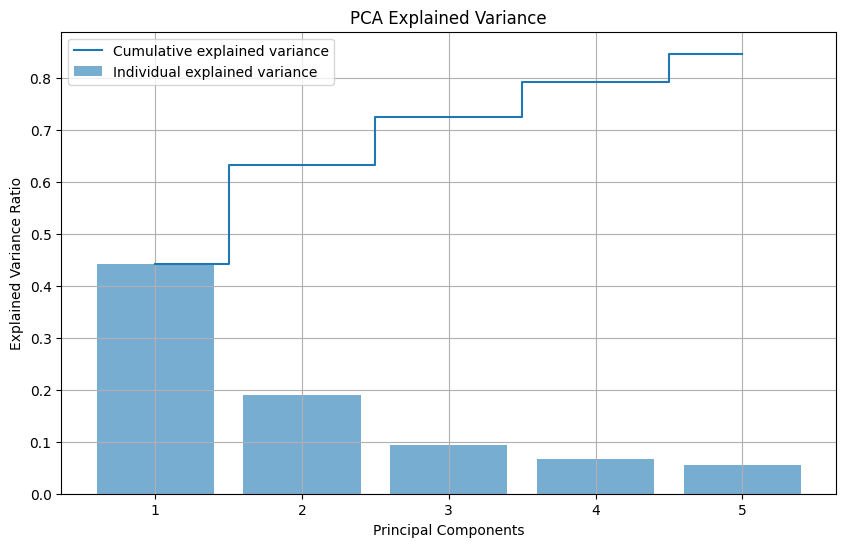

PCA Summary:
  Principal Component  Explained Variance Ratio  Cumulative Variance Ratio  \
0                 PC1                  0.442720                   0.442720   
1                 PC2                  0.189712                   0.632432   
2                 PC3                  0.093932                   0.726364   
3                 PC4                  0.066021                   0.792385   
4                 PC5                  0.054958                   0.847343   

   Eigenvalues  
0    13.304991  
1     5.701375  
2     2.822910  
3     1.984128  
4     1.651633  

Principal Component Loadings:
      radius1  texture1  perimeter1     area1  smoothness1  compactness1  \
PC1  0.218902  0.103725    0.227537  0.220995     0.142590      0.239285   
PC2 -0.233857 -0.059706   -0.215181 -0.231077     0.186113      0.151892   
PC3 -0.008531  0.064550   -0.009314  0.028700    -0.104292     -0.074092   
PC4  0.041409 -0.603050    0.041983  0.053434     0.159383      0.031795   
PC5  

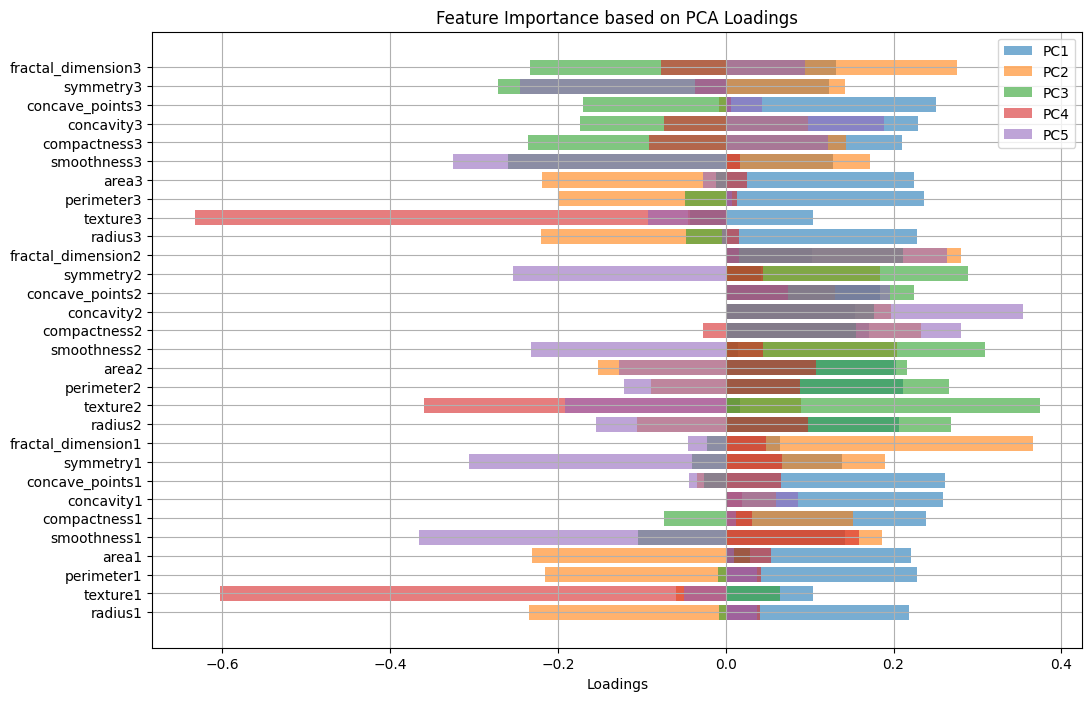


Feature Importance (sorted):
                    Importance
Feature                       
texture2              1.033547
smoothness1           0.957466
texture3              0.917926
smoothness3           0.902142
concavity2            0.882560
texture1              0.880499
fractal_dimension2    0.872766
compactness2          0.865327
radius2               0.832410
symmetry3             0.816910
symmetry2             0.811873
fractal_dimension3    0.811392
concave_points2       0.808012
area2                 0.806948
smoothness2           0.804531
compactness3          0.802897
perimeter2            0.777411
concavity3            0.762259
symmetry1             0.741822
fractal_dimension1    0.546524
area1                 0.544536
radius1               0.540486
perimeter1            0.531391
radius3               0.515194
area3                 0.509410
compactness1          0.508767
perimeter3            0.506322
concave_points3       0.478826
concave_points1       0.430382
concavity

In [4]:
# Удаление столбца ID
data = data.drop(columns=['ID'])
# Определение целевой переменной и признаков
target_column = 'Diagnosis'
X = data.drop(columns=[target_column])
y = data[target_column]

# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Функция для анализа PCA
def pca_analysis(data, target_column, n_parameters):
    # Разделяем целевую переменную и признаки
    X = data.drop(columns=[target_column])
    y = data[target_column]

    # Применяем PCA
    pca = PCA(n_components=n_parameters)
    pca.fit(X_scaled)

    # Получаем значимость компонентов
    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)
    # Получаем собственные значения и векторы
    eigenvalues = pca.explained_variance_
    components = pca.components_

    # Создаем график объясненной дисперсии
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, n_parameters + 1), explained_variance, alpha=0.6, align='center', label='Individual explained variance')
    plt.step(range(1, n_parameters + 1), cumulative_variance, where='mid', label='Cumulative explained variance')
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.title('PCA Explained Variance')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

    # Возвращаем DataFrame с результатами
    pca_summary = pd.DataFrame({
        'Principal Component': [f'PC{i + 1}' for i in range(n_parameters)],
        'Explained Variance Ratio': explained_variance,
        'Cumulative Variance Ratio': cumulative_variance,
        'Eigenvalues': eigenvalues
    })

    # Выводим компоненты
    components_df = pd.DataFrame(components, columns=X.columns, index=[f'PC{i + 1}' for i in range(n_parameters)])

    return pca_summary, components_df

# Функция для визуализации важности признаков
def plot_feature_importance(components_df):
    plt.figure(figsize=(12, 8))
    for i in range(components_df.shape[0]):
        plt.barh(components_df.columns, components_df.iloc[i], alpha=0.6, label=f'PC{i + 1}')
    plt.xlabel('Loadings')
    plt.title('Feature Importance based on PCA Loadings')
    plt.legend()
    plt.grid(True)
    plt.show()

# Функция для вывода признаков по важности
def feature_importance(components_df):
    # Вычисляем абсолютные значения нагрузок
    importance = np.abs(components_df).sum(axis=0)

    # Создаем DataFrame для важности признаков
    importance_df = pd.DataFrame(importance, columns=['Importance'])
    importance_df.index.name = 'Feature'
    
    # Сортируем по важности в убывающем порядке
    sorted_importance_df = importance_df.sort_values(by='Importance', ascending=False)

    return sorted_importance_df

n_parameters = 5   
pca_summary, components_df = pca_analysis(data, target_column, n_parameters)

#  результаты
print("PCA Summary:")
print(pca_summary)
print("\nPrincipal Component Loadings:")
print(components_df)

# Визуализируем важность признаков
plot_feature_importance(components_df)

# Выводим список признаков в убывающем порядке по важности
sorted_importance_df = feature_importance(components_df)
print("\nFeature Importance (sorted):")
print(sorted_importance_df)


In [5]:
# Получаем 10 наиболее важных признаков
top_n_features = sorted_importance_df.head(10).index.tolist()

# Разделение данных на X и y
X_top = data[top_n_features]
y = data[target_column].replace({'M': 1, 'B': 0})  # Замена значений в целевой переменной

# Разделение на тренировочную и тестовую выборки с стратификацией
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42,
                                                    stratify=y, shuffle=True,)

# Выводим размеры тренировочной и тестовой выборок
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Стандартизация 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Training set size: 455
Test set size: 114


In [11]:
%%time
# Настройка логистической регрессии с подбором по сетке
param_grid = {
    'C': np.logspace(-10, 10, 20),                                      
     'solver': ['lbfgs', 'liblinear', 'newton-cg','sag','saga'],         
     'max_iter': [30, 70, 100, 150, 200, 300],                           
     'penalty': ['l2','l1', 'elasticnet','none'],                        
     'random_state': [42],
}

# Создаем модель логистической регрессии
log_reg = LogisticRegression()

# Настройка GridSearchCV с 7 фолдами
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=7, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Получаем лучшие параметры
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Предсказания на тестовой выборке
y_pred = grid_search.predict(X_test_scaled)
y_pred_proba = grid_search.predict_proba(X_test_scaled)[:, 1] 
# Оценка модели
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Best parameters: {'C': 428.13323987193957, 'max_iter': 30, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs'}

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        72
           1       0.94      0.79      0.86        42

    accuracy                           0.90       114
   macro avg       0.91      0.88      0.89       114
weighted avg       0.91      0.90      0.90       114


Confusion Matrix:
[[70  2]
 [ 9 33]]
CPU times: total: 3.81 s
Wall time: 6.38 s


In [12]:
# Вычисление  метрик
mean_cv_score = grid_search.best_score_
test_score = accuracy_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nMean CV Score: {mean_cv_score:.4f}")
print(f"Test Score (Accuracy): {test_score:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Mean CV Score: 0.9429
Test Score (Accuracy): 0.9035
Accuracy: 0.9035
Balanced Accuracy: 0.8790
Precision: 0.9429
Recall: 0.7857
F1 Score: 0.8571


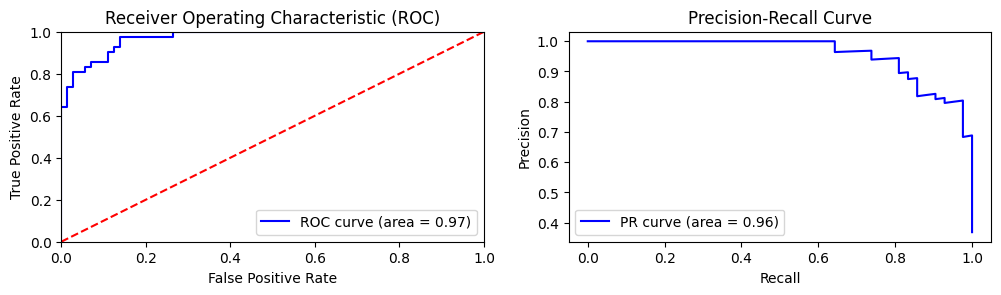

In [13]:
# Визуализация ROC AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')

# Визуализация Precision-Recall AUC
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = average_precision_score(y_test, y_pred_proba)

plt.subplot(2, 2, 2)
plt.plot(recall_vals, precision_vals, color='blue', label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left');